# Titanic: Machine Learning from Disaster
## An elaborate, comprehensive guide for beginners and intermediate machine learning engineers!
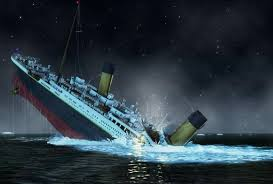

Let's do it! Welcome to the "Hello World" of Machine Learning. This notebook I am creating is not as much for me as it is for you! I hope we will all learn something from this notebook today. That's why I will be going step-by-step in this notebook and will try to explain everything I possibly can. Let's learn and let's have some fun! 

## Proposed procedure:
I know we can just take the data and "slap" it onto any model, be it Linear Regression, Logistic Regression or a Decision Tree, and get predictions. Quite good predictions, even!
But we won't be doing it like this, NO!
(Who are 'we' you ask? Silly! You and me of-course)

These are the steps we will implementing:
* Look at the big Picture, let's first answer, what is it we are doing?
* Explore the data to gain insights (EDA and visualizations).
* Prepare the data to better expose the underlying data patterns (This will include dealing with null values and outliers)
* And now, finally what we came here for! Exploring the model, we will define our model and then 'train' it with best hyperparameters. 
* Then, after that will we submit the solution!

  Definitely, much more work than just importing the model and training it, but believe me, it will be worth it!

# The Big Picture:
## What’s the goal?
This is the most critical step. The goal is to predict whether a passenger survived or not based on their features (like age, sex, class, etc.). So, we’re solving a **binary classification** problem where we want to classify each passenger as either **Survived** (1) or **Did not survive** (0). Simple enough?
## Contextual Understanding:
This isn’t just about running models—it's about understanding why some factors might affect survival rates (e.g., higher class, being a woman or child, etc.) and how we can use that knowledge to inform our feature engineering and modeling. There is a lovely quote by **Ralph Engelbrecht** that I like very much, and I'd appreciate it if you also remember it: 
**"Building and training a model is the easy part of machine learning. The hard part is getting the data ready."**
The most fun part in machine learning (at least according to me) is playing with the data, finding hidden connections, "cleaning" data and doing stuff with it. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # data visualization
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # encoding categorical values
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split # Splitting the dataset

from sklearn.ensemble import RandomForestClassifier # This is the model we will be using today, more about it later
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # To be used for model evaluation

import warnings # We like doing dangerous stuff, we don't ignore warnings XD (But be careful in real life kids, listen to warnings! LOL)
warnings.filterwarnings('ignore')

In [2]:
# Importing the DataSet
train= pd.read_csv('/kaggle/input/titanic/train.csv')
test= pd.read_csv('/kaggle/input/titanic/test.csv')

'''
Oh, and btw, I recommend you to study numpy, pandas and matplotlib before going through this notebook.
They are the basic libraries we use and you need to be well acquainted with them! 
You will be using them a lot, not only in this project, but also in every project in future (hopefully).
'''

'\nOh, and btw, I recommend you to study numpy, pandas and matplotlib before going through this notebook.\nThey are the basic libraries we use and you need to be well acquainted with them! \nYou will be using them a lot, not only in this project, but also in every project in future (hopefully).\n'

# Data Exploration and Feature Engineering:
Now comes the fun part. Let's dive deep into the sea of data and also find out and deal with any icebergs that might hurt our ship.

We will divide this into following parts:
1) EDA.
2) Data Visualization. (Distribution of each column)
3) Removal of unwanted columns.
4) Filling missing values.
5) Visualizing outliers.
6) More visualization (beacuse, why not?), this time we will explore the relationships between different columns.

In [3]:
train.head()
# Shows top 5 rows of the train dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()
# Shows top 5 rows of the test dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()
# provides information about the train dataset: Columns, number of non-missing values in each columns, and data type of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe().T
# Provides the statistical description of all the numerical columns

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
train.nunique()
# Gives the number of unique values in each class (column)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## List of variables:

**1. Target Variable** (What we're predicting)
* **Survived** (0 = No, 1 = Yes): This is the target variable (binary classification) that indicates whether the passenger survived or not.


**2. Categorical Features** (Qualitative)
* **Pclass**: Passenger class (1st, 2nd, or 3rd) – categorical, but numerical in nature.
* **Sex**: Gender of the passenger (male, female).
* **Name**: The name of the passenger.
* **Ticket**: Ticket number.
* **Cabin**: Cabin number.
* **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


**3. Numerical Features** (Quantitative)
* **Age**: Age of the passenger, numerical.
* **SibSp**: Number of siblings/spouses aboard the Titanic (integer).
* **Parch**: Number of parents/children aboard the Titanic (integer).
* **Fare**: The fare the passenger paid for the ticket (continuous numerical value).

## Visualization

### Visualization of the target variable

I have used pie chart here, you can also use histograms here, as they are commonly used to plot distributions. I personally feel that pies are a better fit when plotting the distributions of variables with 2 possible outputs (or even 3).

Also, I have used beautifying elements like shadows and exploding, which is optional. Even a simple graph is enough.

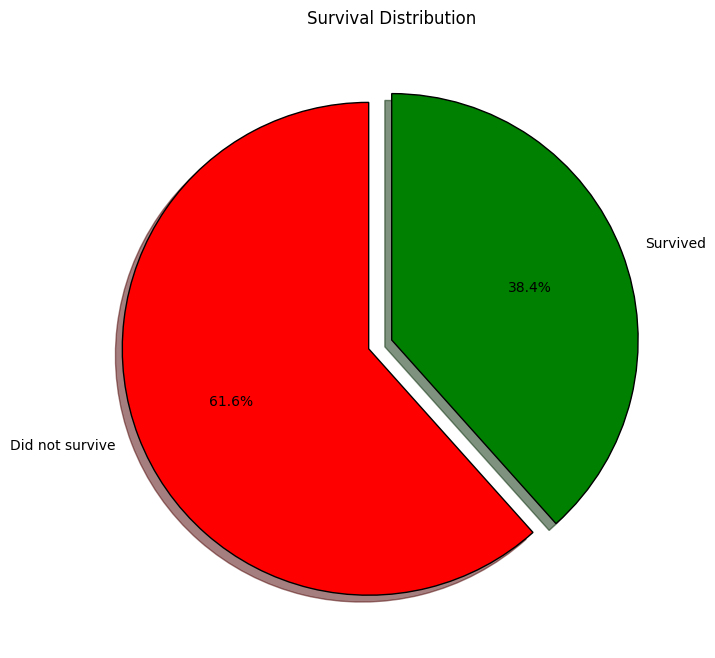

In [8]:
# Survival Distribution Pie chart

# Defining the exploding values
explode = (0.1, 0)  # "0.1" for the first slice (survived), "0" for the second slice (did not survive)

# Plotting the pie chart
train['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    labels=['Did not survive', 'Survived'], 
    startangle=90, 
    colors=['red', 'green'], 
    explode=explode,  # Adding the explode effect
    shadow=True,  # Adding shadow for a 3D effect
    wedgeprops={'edgecolor': 'black'},  # Adding black borders to slices
    figsize=(8,8)  # Ensuring it's circular
)

# Adding a title
plt.title('Survival Distribution')

# Display the plot
plt.ylabel('')  # Hide the ylabel since it's redundant for a pie chart
plt.show()


### Visualization of other variables:

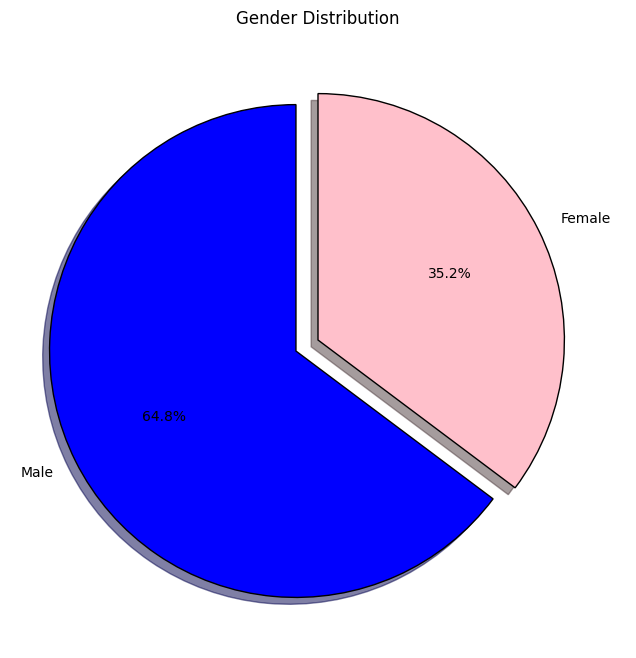

In [9]:
# 2. Gender Distribution (Sex column) - Pie chart
plt.figure(figsize=(8,8))
train['Sex'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    labels=['Male', 'Female'], 
    startangle=90, 
    colors=['blue', 'pink'], 
    explode=(0.1, 0),  # Exploding the male slice for a visual effect
    shadow=True, 
    wedgeprops={'edgecolor': 'black'},
    figsize=(8,8)
)
plt.title('Gender Distribution')
plt.ylabel('')  # Hide the ylabel since it's redundant for a pie chart
plt.show()

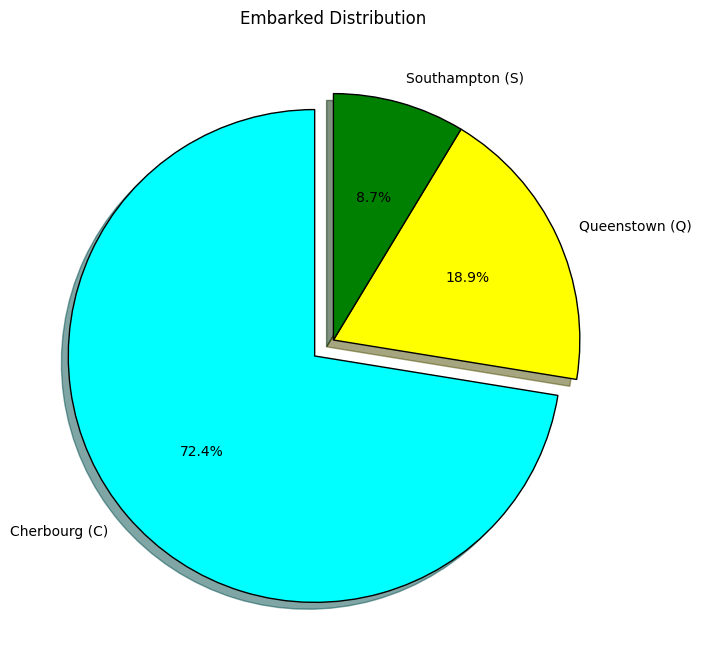

In [10]:
# 3. Embarked Distribution (Embarked column) - Pie chart
plt.figure(figsize=(8,8))
train['Embarked'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'], 
    startangle=90, 
    colors=['cyan', 'yellow', 'green'], 
    explode=(0.1, 0, 0),  # Exploding the Cherbourg slice for emphasis
    shadow=True, 
    wedgeprops={'edgecolor': 'black'},
    figsize=(8,8)
)
plt.title('Embarked Distribution')
plt.ylabel('')
plt.show()

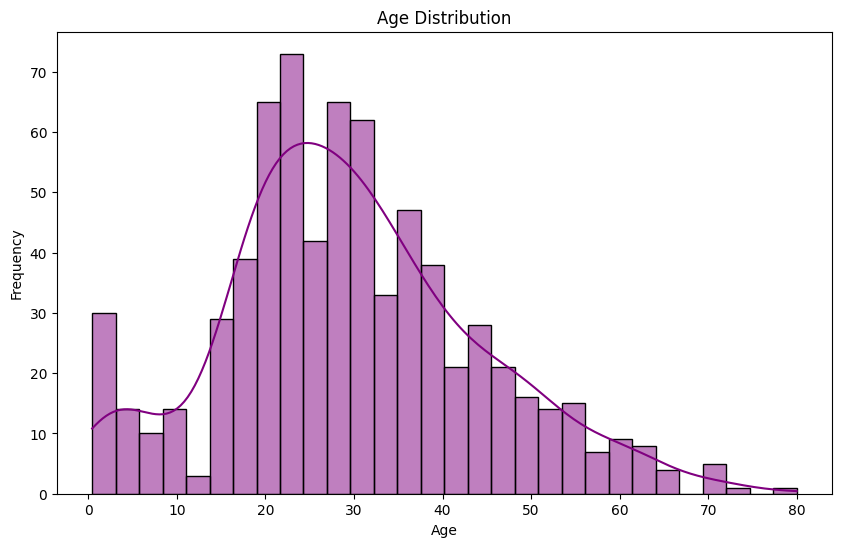

In [11]:
# 4. Age Distribution (Age column) - Histogram
plt.figure(figsize=(10,6))
sns.histplot(train['Age'].dropna(), bins=30, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

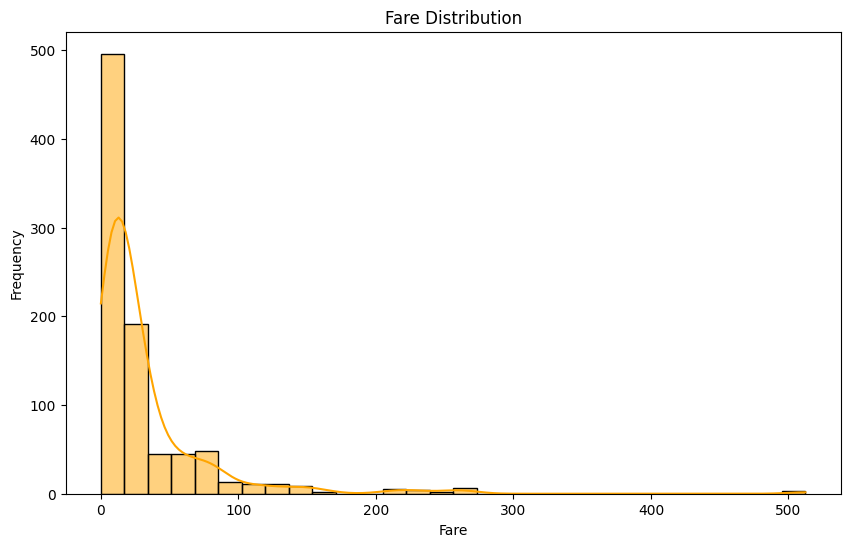

In [12]:
# 5. Fare Distribution (Fare column) - Histogram
plt.figure(figsize=(10,6))
sns.histplot(train['Fare'], bins=30, kde=True, color='orange')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

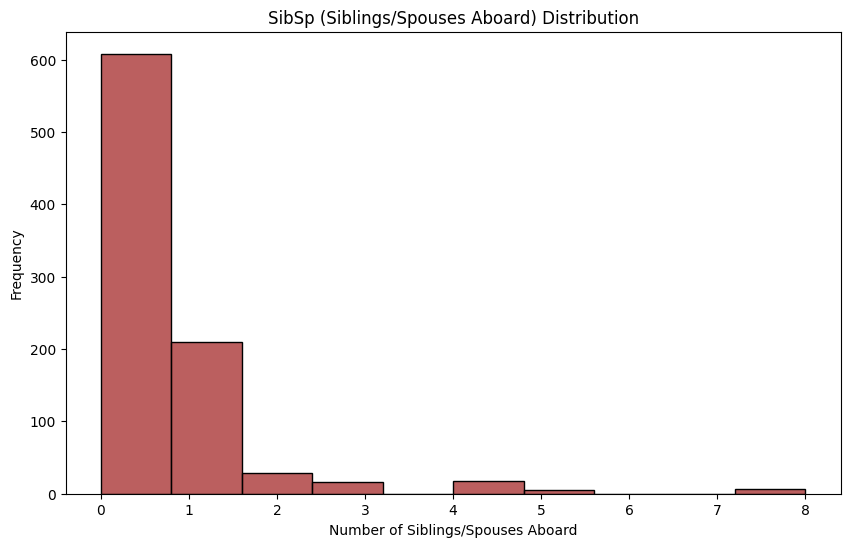

In [13]:
# 6. SibSp Distribution (Number of Siblings/Spouses Aboard) - Histogram
plt.figure(figsize=(10,6))
sns.histplot(train['SibSp'], bins=10, kde=False, color='brown')
plt.title('SibSp (Siblings/Spouses Aboard) Distribution')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Frequency')
plt.show()

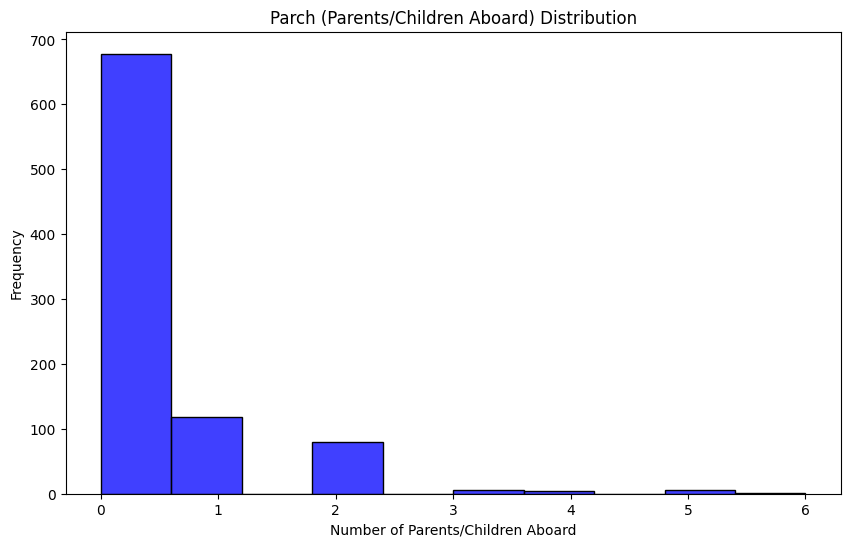

In [14]:
# 7. Parch Distribution (Number of Parents/Children Aboard) - Histogram
plt.figure(figsize=(10,6))
sns.histplot(train['Parch'], bins=10, kde=False, color='blue')
plt.title('Parch (Parents/Children Aboard) Distribution')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Frequency')
plt.show()

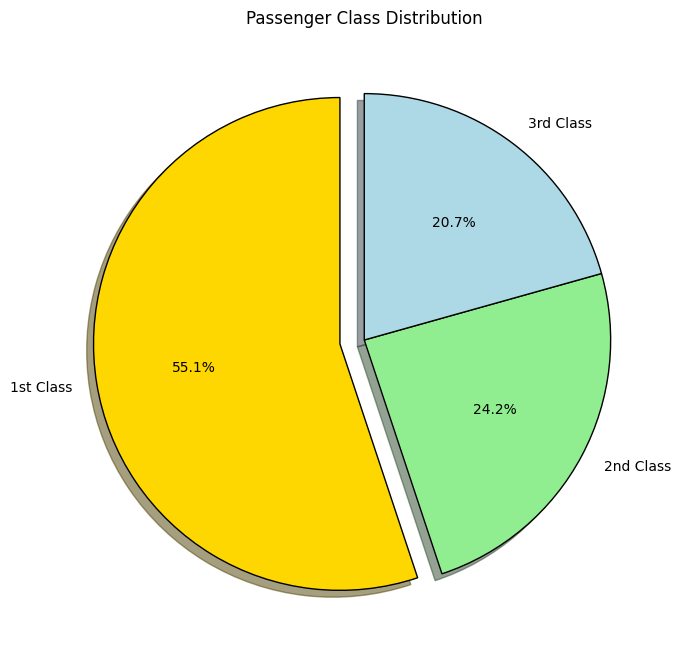

In [15]:
# 8. Passenger Class Distribution (Pclass) - Pie chart
plt.figure(figsize=(8,8))
train['Pclass'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    labels=['1st Class', '2nd Class', '3rd Class'], 
    startangle=90, 
    colors=['gold', 'lightgreen', 'lightblue'], 
    explode=(0.1, 0, 0),  # Exploding the first class slice
    shadow=True, 
    wedgeprops={'edgecolor': 'black'},
    figsize=(8,8)
)
plt.title('Passenger Class Distribution')
plt.ylabel('')
plt.show()

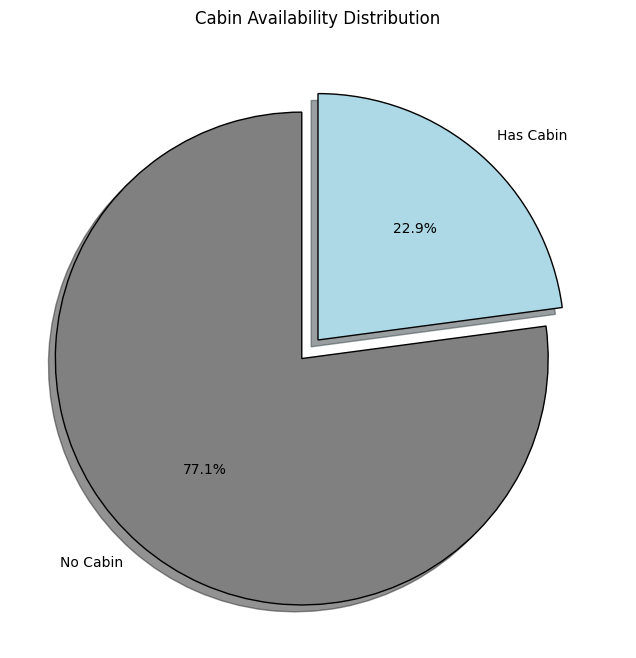

In [16]:
# 9. Cabin Distribution (Presence of Cabin) - Pie chart
plt.figure(figsize=(8,8))
train['Cabin'].notnull().value_counts().plot.pie(
    autopct='%1.1f%%', 
    labels=['No Cabin', 'Has Cabin'], 
    startangle=90, 
    colors=['gray', 'lightblue'], 
    explode=(0.1, 0),  # Exploding the 'Has Cabin' slice
    shadow=True, 
    wedgeprops={'edgecolor': 'black'},
    figsize=(8,8)
)
plt.title('Cabin Availability Distribution')
plt.ylabel('')
plt.show()

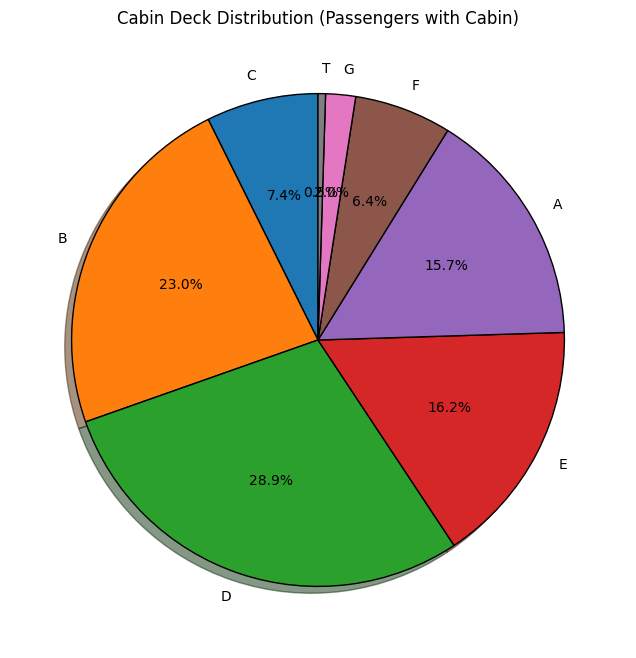

In [17]:
# 10. Cabin Category (Deck) Distribution for Passengers with Cabin

# We will extract the first letter of the 'Cabin' and visualize it
# Extract the deck (first letter of cabin) for passengers with a cabin
train['CabinDeck'] = train['Cabin'].str[0]  # Get the first letter (Deck)

# While we are at it, let's add 'CabinDeck' column on test data as well.
test['CabinDeck'] = test['Cabin'].str[0]

df_with_cabin = train[train['Cabin'].notnull()]  # Filter passengers who have a cabin

# Plot the distribution of cabins by deck (first letter)
plt.figure(figsize=(8,6))
df_with_cabin['CabinDeck'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%', 
    labels=df_with_cabin['CabinDeck'].value_counts().index, 
    startangle=90, 
    shadow=True, 
    wedgeprops={'edgecolor': 'black'},
    figsize=(8,8)
)
plt.title('Cabin Deck Distribution (Passengers with Cabin)')
plt.ylabel('')
plt.show()

### Let's understand the cabin distribution.
You might have noticed earlier that cabin has a lot of missing values. (about 77%). Now if you know even a little bit about data cleaning, you would say that this column is better off not existing, right? So why did we put so much effort into plotting these graphs for cabin? Let's understand:

Cabin is actually an important feature. Missing values mean no access to the cabins. And the first alphabet of available cabin values show the level of the cabin. (Basically understand this as the luxury rooms.) Let's take an example to understand: Suppose, the ultra rich had cabins in level A, and assume it is also in the uppermost level on the ship, and the lifeboats were near that level, and also, as they were VVIP's, their safety was prioritized. So their chance of survival was way more than the middle-class and poor who didn't have their cabins. (We will probably see this as well when we will be visualizing the relationships). So availability of cabin may serve as an important factor in survival. Hence all this work.

### What about names?
Wait! We plotted graphs for all the columns, but nothing for the names. Why?
You probably know the answer already, but even if you don't, it's alright. I will explain.

Answer this:
Do you think someone's name would play a role in their survival? I don't think the workers and hosts would have been standing on a sinking ships and asking people their names, do you? Well, let's say even if they were, as  there were probably some very important person. Let's suppose there is this John in first class, he is a very important person. They ask his name and he says "It's John". They say "We found John, quick! Get him a lifeboat", and then comes another guy whose name is also John, but he was from third class. Would they have given him preferential treatment just because his name was John? Probably no. So, in this case we can safely say that **name** doesn't affect survival at all. So what should we do about this column? 
Yes, we will remove it, as it's not needed. 

(TLDR: Name doesn't affect survival directly or indirectly. So it's useless information in this case)

## Removing unwanted columns.

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinDeck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


(If you are wondering where this 'CabinDeck' came from, refer to plot 10)

Now that we have CabinDeck, we don't need 'Cabin' anymore, so we will remove that.
We will also remove 'PassengerID' and 'Ticket'. (But, there is a way we can use name, so we won't be deleting it for now atleast!)

In [19]:
def drop(df):
    df.drop(columns=['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

drop(train)
drop(test)

#Let's check if the columns are removed or not:
train.head(), test.head()

(   Survived  Pclass                                               Name  \
 0         0       3                            Braund, Mr. Owen Harris   
 1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2         1       3                             Heikkinen, Miss. Laina   
 3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4         0       3                           Allen, Mr. William Henry   
 
       Sex   Age  SibSp  Parch     Fare Embarked CabinDeck  
 0    male  22.0      1      0   7.2500        S       NaN  
 1  female  38.0      1      0  71.2833        C         C  
 2  female  26.0      0      0   7.9250        S       NaN  
 3  female  35.0      1      0  53.1000        S         C  
 4    male  35.0      0      0   8.0500        S       NaN  ,
    Pclass                                          Name     Sex   Age  SibSp  \
 0       3                              Kelly, Mr. James    male  34.5      0   
 1       3         

## Missing Values:
Let's deal wiith the missing values now

In [20]:
train.isnull().sum(), test.isnull().sum()

(Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age          177
 SibSp          0
 Parch          0
 Fare           0
 Embarked       2
 CabinDeck    687
 dtype: int64,
 Pclass         0
 Name           0
 Sex            0
 Age           86
 SibSp          0
 Parch          0
 Fare           1
 Embarked       0
 CabinDeck    327
 dtype: int64)

'Age' has a significant number of missing values. 

We have also got a few missing on 'Embarked' and 'Fare', but the missing values are negligible.

And ofcourse we have 'CabinDeck' with this huge amount of missing values.

### Here is how we will deal with it:
* **Age**: Fill the missing values with the median values based on Pclass and Sex.
* **Embarked**: Just fill in the location with highest number of embarkments which is 'C' (Cherbourgh) in this case
* **Fare**: Only one missing value, we can fll it with the median as well.
* **CabinDeck**: Missing values just mean "no cabin deck here", so we will just fill it with "N" (meaning none) for now.

In [21]:
def fill_empty(df):
    df['Age']= df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
    df['Embarked']=df['Embarked'].fillna('C')
    df['Fare']=df['Fare'].fillna(df['Fare'].median())
    df['CabinDeck']=df['CabinDeck'].fillna('N')

fill_empty(train)
fill_empty(test)

# Check for any remaining null values:
train.isnull().sum(), test.isnull().sum()

(Survived     0
 Pclass       0
 Name         0
 Sex          0
 Age          0
 SibSp        0
 Parch        0
 Fare         0
 Embarked     0
 CabinDeck    0
 dtype: int64,
 Pclass       0
 Name         0
 Sex          0
 Age          0
 SibSp        0
 Parch        0
 Fare         0
 Embarked     0
 CabinDeck    0
 dtype: int64)

Looking squeaky clean now, isn't it.

## Ckecking for outliers:
Outliers are data points that are very different from others. For example suppose we have people of different ages in range 18 and 60. Andn then there is a 120 year old guy with them. That guy is what we call outliers.

### Why do we need to ckeck and deal with outliers?
* Linear Models (e.g., Logistic Regression, Linear Regression) are sensitive to outliers. Extreme values can skew the results, especially if the outliers are far from the mean or median. This can lead to distorted predictions because the model tries to fit all data points, including the outliers, and might give them too much weight.
* Tree-based Models (e.g., Random Forest, Decision Trees) are generally more robust to outliers because they work by splitting the data based on features and values, so extreme data points won't necessarily dominate the decision-making process. However, if outliers are extreme enough, they might still affect the model, particularly in terms of overfitting.
* Sometimes, outliers are not legitimate data points but instead are due to data entry errors. For example, an age of 200 or a fare of $10,000 could be the result of a typo or incorrect data entry. Identifying these outliers helps clean the data and ensures that you're working with accurate values.
* Outliers can drastically affect the mean and standard deviation of a dataset. For instance, in a feature like Fare, if a few passengers paid extremely high prices, the mean fare might be much higher than the typical fare, which might not be the most representative value. This can also distort other statistical measures (like variance and correlation).
* Outliers can make the relationships between variables less interpretable. For example, if there’s an outlier in the Age feature, the relationship between Age and Survival could be misleading because the model might give too much importance to that extreme value.

### Checking for outliers:
We can check outliers two ways; Visually and statistically.
* Visual: We draw **boxplots** to check for presence of outliers.
* Statistical: We calculate **Z-Scores** or **IQR** to statistically find potential outliers.
  We will be plotting boxplots. If the outliers are not significant enough, we can ignore them as they won't affect the model performance much, but if there are some drastic outliers, we will have to deal with them.

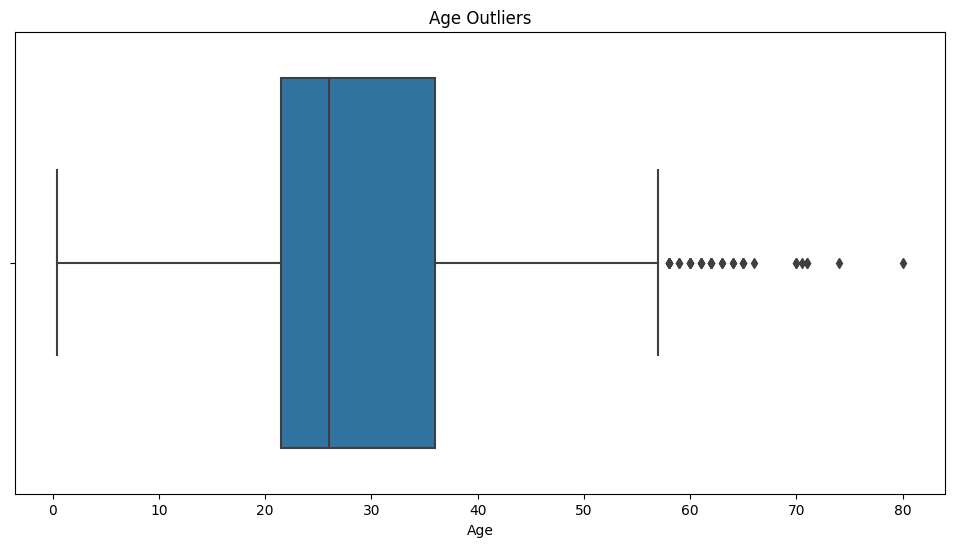

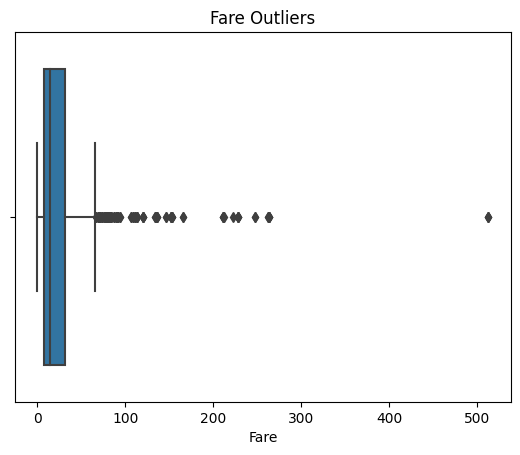

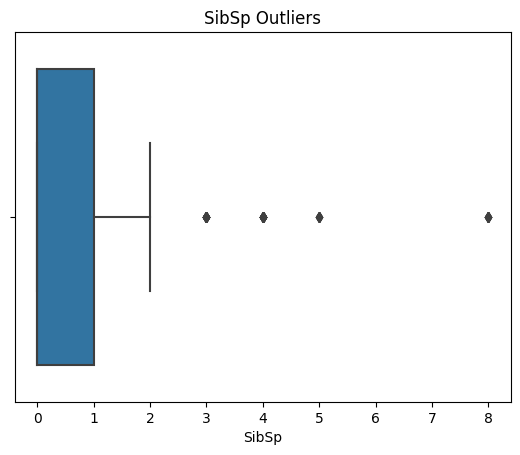

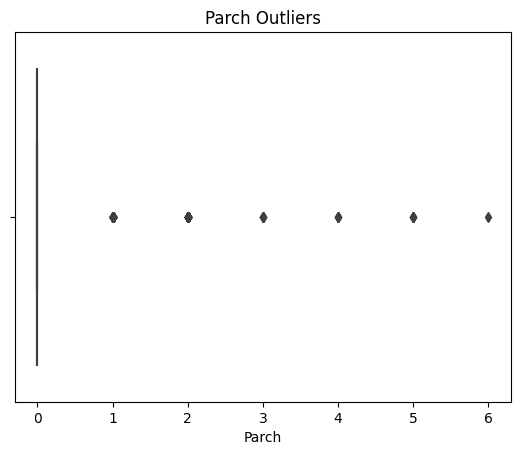

In [22]:
# Set up the figure size
plt.figure(figsize=(12,6))

# Box plots to detect outliers for numerical columns
sns.boxplot(x=train['Age'])
plt.title('Age Outliers')
plt.show()

sns.boxplot(x=train['Fare'])
plt.title('Fare Outliers')
plt.show()

sns.boxplot(x=train['SibSp'])
plt.title('SibSp Outliers')
plt.show()

sns.boxplot(x=train['Parch'])
plt.title('Parch Outliers')
plt.show()


Currently, we have decided to not do anything about it. The outliers are present, but are not significant enough. (Well, except for that guy who paid over 500 when most of the others were paying less than 100 lol)

## Visualizing the relationships

These are what we will be plotting:
* Survival by Age (boxplot)
* Survival by Fare (boxplot)
* Survival by SibSp and Parch (boxplot)
* Survival by Pclass (barplot)
* Survival by Sex (barplot)
* Survival by Embarked (barplot)
* Correlation Heatmap (for numerical features)

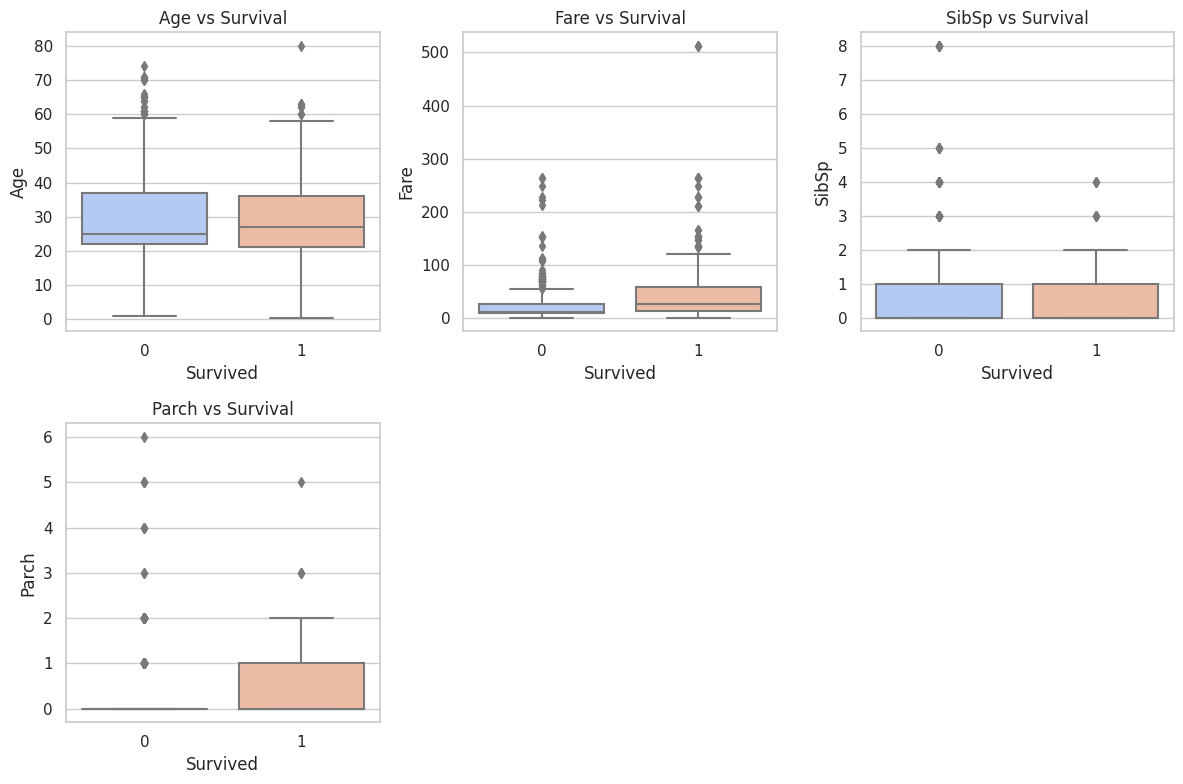

In [23]:
# Plotting Survival by Age, Fare, SibSp and Parch

sns.set(style="whitegrid")

# Set up the figure size
plt.figure(figsize=(12, 8))

# Plot: Age vs. Survival
plt.subplot(2, 3, 1)
sns.boxplot(x='Survived', y='Age', data=train, palette='coolwarm')
plt.title('Age vs Survival')

# Plot: Fare vs. Survival
plt.subplot(2, 3, 2)
sns.boxplot(x='Survived', y='Fare', data=train, palette='coolwarm')
plt.title('Fare vs Survival')

# Plot: SibSp vs. Survival
plt.subplot(2, 3, 3)
sns.boxplot(x='Survived', y='SibSp', data=train, palette='coolwarm')
plt.title('SibSp vs Survival')

# Plot: Parch vs. Survival
plt.subplot(2, 3, 4)
sns.boxplot(x='Survived', y='Parch', data=train, palette='coolwarm')
plt.title('Parch vs Survival')

# Adjust the layout
plt.tight_layout()
plt.show()

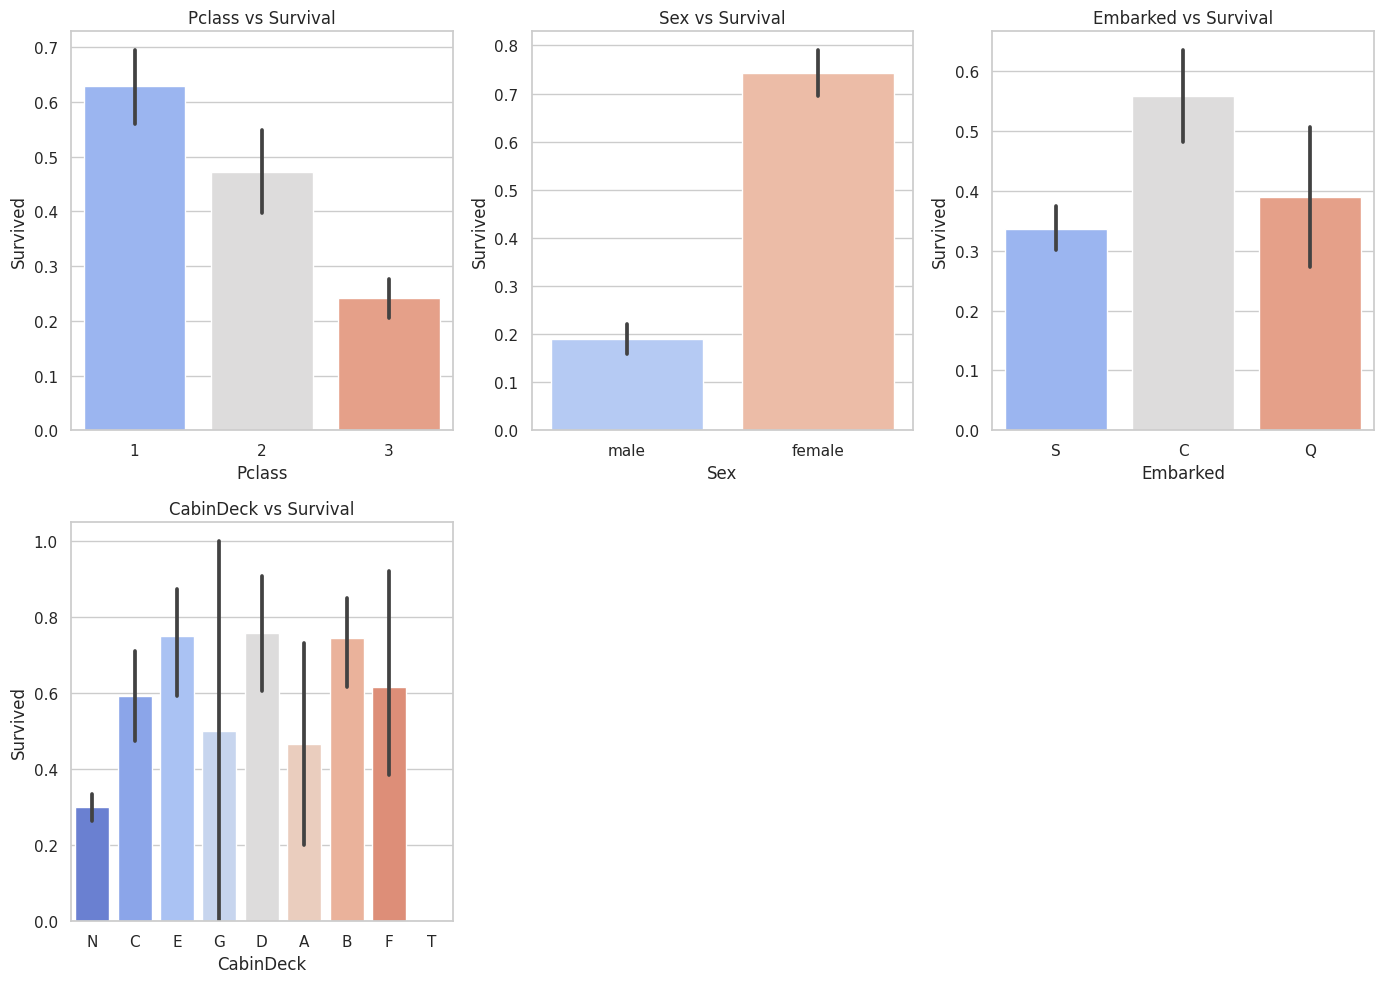

In [24]:
# Set up the figure size
plt.figure(figsize=(14, 10))

# Plot: Pclass vs. Survival (Barplot)
plt.subplot(2, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=train, palette='coolwarm')
plt.title('Pclass vs Survival')

# Plot: Sex vs. Survival (Barplot)
plt.subplot(2, 3, 2)
sns.barplot(x='Sex', y='Survived', data=train, palette='coolwarm')
plt.title('Sex vs Survival')

# Plot: Embarked vs. Survival (Barplot)
plt.subplot(2, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=train, palette='coolwarm')
plt.title('Embarked vs Survival')

# Plot: CabinDeck vs. Survival (Barplot)
plt.subplot(2, 3, 4)
sns.barplot(x='CabinDeck', y='Survived', data=train, palette='coolwarm')
plt.title('CabinDeck vs Survival')

# Adjust the layout
plt.tight_layout()
plt.show()


### Inference:
* Class of a passenger had a direct relation with survival, First class passengers had higher survival rates.
* Females had more survival rates than males. (Why? Females were given more preference to be saved, or was it chivalry?)
* It's surprising. Although there were more than 77% of people who embark from Cherbourg, the survival rates aren't as dominating though.
* Cabin Decks did indeed have a major influence on survival as we forsaw earlier. People with no cabins had lower survival rates than those with cabin, despite being the majority of people (77%)

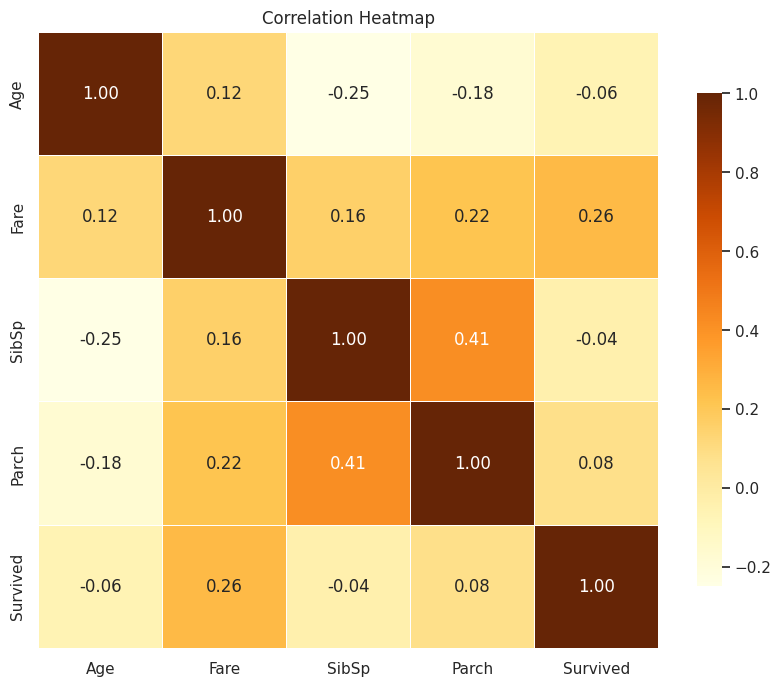

In [25]:
# Plot: Correlation Heatmap for numerical features
plt.figure(figsize=(10, 8))
corr_matrix = train[['Age', 'Fare', 'SibSp', 'Parch','Survived']].corr()  # Correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()

Now that we are done with visualizations, let's move on to preparing the data for the model.

# Encoding Categorical Variables and Feature Engineering:

* **Categorical** variables (like Sex, Pclass, Embarked, CabinDeck) need to be converted into numerical representations because machine learning models can’t work with text directly. We can do this with techniques like **One-Hot Encoding** or **Label Encoding**.
* We will be creating new features based on relationships observed from the graphs, like:
    * **Family Size:** Combining SibSp and Parch to create a "family size" feature.
    * **Title:** Extracting the title (Mr, Mrs, Miss) from the Name feature might give us additional insight into survival patterns. (that's why we didn't delete (or drop) the 'Name' column yet!)
    * **CabinDeck:** We have already created this feature when plotting the distribution of each feature. (ref. plot 10)

## Encoding Categorical Variables

In [26]:
def encode(df):
    # Label encode 'Sex' and 'Pclass' (binary and ordinal)
    label_encoder = LabelEncoder() # 1, 2, 3
    df['Sex']= label_encoder.fit_transform(df['Sex'])  # 0 for male, 1 for female
    df['Pclass'] = label_encoder.fit_transform(df['Pclass'])
    
# Label encoding train and test:
encode(train)
encode(test)

# One-hot encoding on train and test:
# One-hot encode 'Embarked', and 'CabinDeck' (nominal)
train = pd.get_dummies(train, columns=['Embarked', 'CabinDeck'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked', 'CabinDeck'], drop_first=True)



# Check the resulting columns
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_N,CabinDeck_T
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,False,True,False,False,False,False,False,False,True,False
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,False,False,False,True,False,False,False,False,False,False
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,False,True,False,False,False,False,False,False,True,False
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,False,True,False,True,False,False,False,False,False,False
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,False,True,False,False,False,False,False,False,True,False


## Feature Engineering

In [27]:
# Creating a map for titles:
titles={
        'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Rev': 5,
        'Col': 6, 'Major': 7, 'Mlle': 8, 'Ms': 9, 'Lady': 10, 'Countess': 11,
        'Jonkheer': 12, 'Dona': 13, 'Sir': 14, 'Capt': 15, 'Mme': 16, 'Don': 17
}

def feature_engg(df):
    # Family Size:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger itself
    
    # Title:
    df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    df['Title'] = df['Title'].map(titles).fillna(-1)  # Assigning -1 for unknown titles

    # Drop Name column:
    df.drop('Name', axis=1, inplace=True)

# Applying Feature Engineering:
feature_engg(train)
feature_engg(test)

In [28]:
# Check the datasets now

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_N,CabinDeck_T,FamilySize,Title
0,0,2,1,22.0,1,0,7.2500,False,True,False,False,False,False,False,False,True,False,2,0.0
1,1,0,0,38.0,1,0,71.2833,False,False,False,True,False,False,False,False,False,False,2,2.0
2,1,2,0,26.0,0,0,7.9250,False,True,False,False,False,False,False,False,True,False,1,1.0
3,1,0,0,35.0,1,0,53.1000,False,True,False,True,False,False,False,False,False,False,2,2.0
4,0,2,1,35.0,0,0,8.0500,False,True,False,False,False,False,False,False,True,False,1,0.0


# Splitting the Dataset

* We split the dataset into features **X** and **y**
* We then split the features into Training and Testing sets.
* This can be done using **train_test_split** library

In [29]:
# Features (X) and Target (y)
X = train.drop('Survived', axis=1)  # Dropping irrelevant column
y = train['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Test_size=0.2: test set will have 20% of data

# Check the shapes
X_train.shape, X_test.shape


((712, 18), (179, 18))

# **Model: RandomForest**

Before we move on to *training* the model, we first need to have a knowledge of the model.
So, here is a crash course about Random Forest for you. If you go through it and understand it thoroughly, I can promise, you won't need any other guide on Random Forest after that.

## **What is a Random Forest?**

**Random Forest** is an ensemble learning algorithm that combines the predictions of multiple individual models (called decision trees) to make a final prediction. The main idea is that, by combining multiple trees, we can reduce the overfitting and variance that single decision trees might have. This makes **Random Forest** a **robust and highly accurate model**, especially for complex datasets.

### Key Features of Random Forest:
1. **Ensemble Learning**:
   - **Random Forest** is an example of an **ensemble learning** technique, where multiple individual models (called **base learners**) are trained and their predictions are combined.
   - In the case of **Random Forest**, the base learners are **decision trees**.

2. **Decision Trees**:
   - A **decision tree** is a flowchart-like structure used for making decisions or predictions.
   - At each node, it splits the data based on a feature and condition (e.g., if `Age > 30`, go left; otherwise, go right).
   - The tree continues to split until a **leaf node** is reached, which contains the prediction (for regression, it’s the average value; for classification, it’s the majority class).

3. **Randomness**:
   - The "random" part of **Random Forest** comes from two aspects:
     - **Random Subset of Data**: For each tree, a random subset of the training data is selected using **bootstrapping** (random sampling with replacement). This ensures each tree is trained on different data, helping to reduce overfitting.
     - **Random Subset of Features**: At each node, the algorithm randomly selects a subset of features (instead of considering all features) to decide the best split. This further introduces randomness and makes the trees more diverse.

4. **Voting/Averaging**:
   - **For classification**: After each tree makes its prediction, the final prediction is determined by **majority voting**. The class that the most trees predict becomes the final prediction.
   - **For regression**: The final prediction is the **average** of all the individual tree predictions.

---

## **How Random Forest Works (Step-by-Step)**

Here’s a simple step-by-step explanation of how the **Random Forest** algorithm works:

1. **Bootstrap Sampling**:
   - The training dataset is randomly sampled with replacement to create several new datasets (one for each tree). Each tree in the forest is trained on a slightly different set of data.

2. **Building Multiple Decision Trees**:
   - For each sampled dataset, a decision tree is built. At each node of the tree, a random subset of features is selected, and the best split is made based on those features. This process continues until the tree is fully grown (usually until a certain depth or until nodes are pure enough).
   
3. **Prediction**:
   - **For classification**: Each tree casts a vote for the class it predicts. The final prediction is the class that receives the most votes from the trees.
   - **For regression**: Each tree predicts a numerical value, and the final prediction is the average of all the trees' predictions.

4. **Aggregating the Results**:
   - By combining the predictions of many trees, **Random Forest** reduces the variance of the predictions, leading to a more robust and accurate result than any individual tree.

---

## **Advantages of Random Forest**

- **High Accuracy**: Random Forest is known for its **high accuracy** because it reduces overfitting and variance by averaging multiple decision trees.
  
- **Robustness**: It’s a **non-parametric** model, meaning it doesn’t make strong assumptions about the data distribution. Random Forest can handle both **linear and non-linear relationships**.
  
- **Handles Missing Data**: Random Forest can handle missing data quite well by splitting on available features and maintaining the integrity of the model.
  
- **Feature Importance**: Random Forest provides insights into which features are most important in predicting the target. This is valuable for understanding the data and building interpretability.

- **Works Well with Large Datasets**: It can efficiently handle large datasets with a large number of features.

- **Overfitting Prevention**: By averaging multiple trees, **Random Forest** can prevent overfitting, a problem that individual decision trees often struggle with.

---

## **Disadvantages of Random Forest**

- **Model Interpretability**: While individual decision trees are easy to interpret, **Random Forest** models are much harder to interpret due to the large number of trees. It’s a **black-box model**.
  
- **Computational Complexity**: Random Forest can be computationally intensive because it needs to build many decision trees, especially when the dataset is large.

- **Memory Intensive**: Since the model involves storing multiple decision trees, it can consume a lot of memory, especially with a large number of trees or large feature sets.

---

## **When to Use Random Forest?**

- **Large, Complex Datasets**: Random Forest works great for datasets with a large number of features and non-linear relationships. It's often the go-to algorithm for a variety of practical problems.
  
- **Classification and Regression Tasks**: It’s a versatile algorithm that can be used for both **classification** (predicting categorical values) and **regression** (predicting continuous values).

---

## **Random Forest Hyperparameters to Tune**

To make the most of **Random Forest**, we can tune several hyperparameters. Some of the key ones include:

1. **n_estimators**: The number of trees in the forest. More trees usually improve performance but increase computation time.

2. **max_depth**: The maximum depth of each tree. Limiting the depth of trees can help prevent overfitting.

3. **min_samples_split**: The minimum number of samples required to split an internal node. This helps control overfitting by restricting the number of splits.

4. **min_samples_leaf**: The minimum number of samples required to be at a leaf node. A higher value prevents overfitting by making the tree more general.

5. **max_features**: The number of features to consider when looking for the best split at each node. Using fewer features can make the trees less correlated.

6. **bootstrap**: Whether bootstrap sampling is used to build trees. By default, it's set to `True`, but you can change it to `False` for sampling without replacement.

---

## **Random Forest in Action**

Now that we have a good understanding of how **Random Forest** works, we’re ready to apply it to our Titanic dataset! By using **Random Forest**, we can predict the survival of passengers based on their features.

---

## Steps to train and evaluate the model:
Now that we have a deep insight on Random Forest and it's working,here is what we will be doing:
* Training the **Random Forest** model on the **training set**.
* **Making predictions** on the test set.
* **Evaluating the model** using accuracy and other relevant metrics.

## Training the Random Forest Model:

In [30]:
# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=200, max_depth = 6, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

## Making Predictions

In [31]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

## Evaluate the performance:

In [32]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8380

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
[[92 13]
 [16 58]]


We achieved an accuracy score of 0.82, and it's actually quite good score, but can we make it better? Let's try Hyperparameter tuning :)

# Hyperparameter Tuning

We can perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV to optimize the model. This would allow us to find the best combination of hyperparameters (like n_estimators, max_depth, etc.).

If you are a beginner, you can skip this step. I know working with it can be quite overwhelming. We already got quite good resluts already. 

Also, this will take a few minutes upon execution, so buckle up if you are doing hyperparameter tuning.

In [33]:
'''

# Although we are skipping this, but you can try hyperparameter tuning yourself to see how it affects the accuracy!
# This sample code might be a good starting point:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
accuracy_random = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy (Random Search): {accuracy_random:.4f}")

'''


'\n\n# Although we are skipping this, but you can try hyperparameter tuning yourself to see how it affects the accuracy!\n# This sample code might be a good starting point:\n\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint\n\n# Define parameter distributions\nparam_dist = {\n    \'n_estimators\': randint(50, 200),\n    \'max_depth\': [None, 10, 20, 30, 40, 50],\n    \'min_samples_split\': randint(2, 10),\n    \'min_samples_leaf\': randint(1, 10),\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'bootstrap\': [True, False]\n}\n\n# Perform RandomizedSearchCV\nrandom_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, \n                                   n_iter=100, cv=5, n_jobs=-1, verbose=2)\nrandom_search.fit(X_train, y_train)\n\n# Get the best model\nbest_rf_model = random_search.best_estimator_\ny_pred_tuned = best_rf_model.predict(X_test)\n\n# Evaluate the tuned model\naccuracy_random = accuracy_score(y_test, y_p

In [34]:
# # Detailed classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_tuned))

# # Confusion matrix
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred_tuned))

# Visualizing the results

* Feature Importance
* ROC curve
* True vs Predicted plot

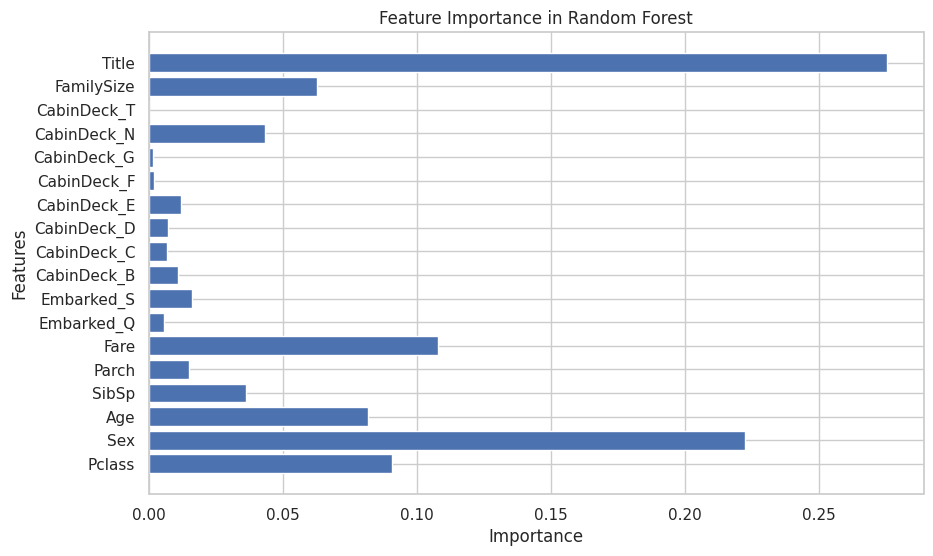

In [35]:
# Get feature importance from the trained model
feature_importance = rf_model.feature_importances_

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

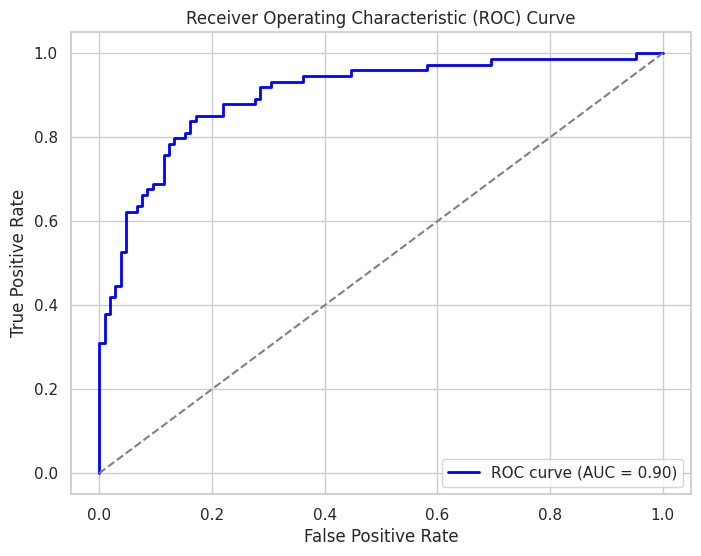

In [36]:
from sklearn.metrics import roc_curve, auc

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

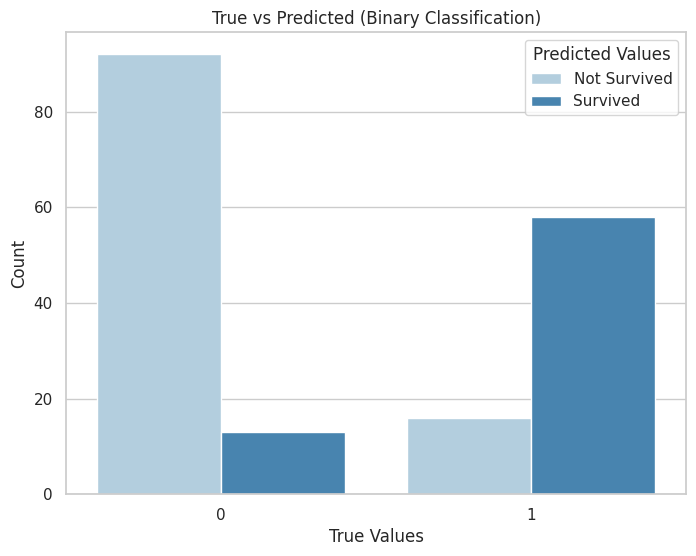

In [37]:
# Countplot of true vs predicted

# Create a comparison DataFrame to easily visualize True vs Predicted values
df_comparison = pd.DataFrame({'True': y_test, 'Predicted': y_pred})

# Plot True vs Predicted using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_comparison, x='True', hue='Predicted', palette='Blues')
plt.title("True vs Predicted (Binary Classification)")
plt.xlabel('True Values')
plt.ylabel('Count')
plt.legend(title='Predicted Values', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

With a final accuracy of 0.838 on test set, we have reached acceptable performance from our model. Let's use that to make predictions on our test dataset and make the final submission file.

## Predicting for the test dataset

In [38]:
# Ensure the test data has the same columns as the training data

test = test.reindex(columns=X_train.columns, fill_value=0)

In [39]:
test_pred = rf_model.predict(test)

In [40]:
# Import the submission file for passenger I'd (as we have already dropped it from the test dataset)
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Create the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_pred
})

# Save the submission file
submission.to_csv('final_submission.csv', index=False)

print("Submission file created: final_submission.csv")


'''
NOTE:
Although I didn't mention it, but you must have noticed that when I was doing any edits on my train set,
I was doing it on my test set as well!
This is important as the model demands data of the similar type as the one it was trained on to perform the predictions.
So, if you encounter any error in predictons, make sure your test data is in the same format as your training data!

Good Luck on your future journey!
'''

'''
What can we do to make the predictions even better?
* Try using different ml algorithms. (Gradient Boosting algorithms might help)
* More feature engineering: Explore adding new features or transforming existing ones
* Cross Validation: Use more robust validation strategies like k-fold.
(Maybe try working with the outliers that we left. Who knows you might see some sudden improvements. ;))

It's possible to refine it more and more. People have been able to achieve an accuracy of 1 (100%) on this. Maybe you can too..
Don't forget to share your results if you try them tho.

'''

Submission file created: final_submission.csv


"\nWhat can we do to make the predictions even better?\n* Try using different ml algorithms. (Gradient Boosting algorithms might help)\n* More feature engineering: Explore adding new features or transforming existing ones\n* Cross Validation: Use more robust validation strategies like k-fold.\n(Maybe try working with the outliers that we left. Who knows you might see some sudden improvements. ;))\n\nIt's possible to refine it more and more. People have been able to achieve an accuracy of 1 (100%) on this. Maybe you can too..\nDon't forget to share your results if you try them tho.\n\n"

# Thank you for being with me till the end. 

## I hope it was helpful to you. Also, any feedbacks and suggestions are very welcome. Feel free to share and copy codes from this notebook. (Don't forget to tag me tho, I would love to see your work too)

## Connect with me on my socials: https://linktr.ee/bhaveshpant

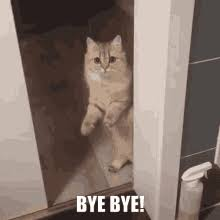